# High Level Machine Learning Classification Project Life Cycle

- <a href='#1'>1. Domain Introduction </a>
- <a href='#2'>2. Problem statement </a>
- <a href='#3'>3. Data Source </a>
- <a href='#4'>4. Data Description </a>
- <a href='#5'>5. Identify the target variable</a>
- <a href='#6'>6. Read the data </a>
- <a href='#7'>7. Inspect the data </a> 
     - <a href='#7.1'> Check few samples</a>
     - <a href='#7.1'> Check the data types</a>
     - <a href='#7.1'> Check the initial summary</a>
- <a href='#7'>8. Data Manipulation  </a>   
     - <a href='#8.1'> Check for missing values</a>
     - <a href='#8.2'> Column string fomatting </a>
     - <a href='#8.3'> Data fomatting </a>
     - <a href='#8.4'> Imputation </a>
- <a href='#9'>9. Exploratory Data Analysis</a>
    - <a href='#9.1'> univariate analysis </a>
    - <a href='#9.2'> class ditribution in data</a>
    - <a href='#9.3'> Varibles distribution according to class</a>
    - <a href='#9.4'> Bucketing </a>
    - <a href='#9.5'> Correlation Matrix</a>
    - <a href='#9.6'> feature elimination / addition / transformation </a>
- <a href='#10'>10. Data preprocessing</a>
    - <a href='#10.1'> Encoding categorical variable </a>
    - <a href='#10.2'> Normalizing features </a>
    - <a href='#10.3'> spliting train/val/test data </a>
    - <a href='#'> feature compression </a>
- <a href='#11'>11. Model Building</a>
    - <a href='#11.1'> Baseline Model</a>
    - <a href='#11.2'> Model Selection </a>
    - <a href='#11.3'> Hyper parameter Selection </a>
    

# <a id='1'>1.Domain Introduction</a>

We have the customer data for a **telecom** company which offers many services like phone, internet, TV Streaming and Movie Streaming. 

# <a id='2'>2.Problem Statement</a>


"Find the Best model to predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."


# <a id='3'>3. Data Source </a>

Available at : [IBM watson analytics page](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?cm_mc_uid=14714377267115403444551&cm_mc_sid_50200000=12578191540344455127&cm_mc_sid_52640000=36692891540344455130)


# <a id='4'>4. Data Description </a>

This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

# <a id='5'>5. Identify the target variable </a>

The Goal is to predict whether or not a particular customer is likely to retain services. This is represented by the Churn column in dataset. Churn=Yes means customer leaves the company, whereas Churn=No implies customer is retained by the company.

# <a id='6'>6. Read the data </a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')

# <a id='7'>7. Inspect the data </a>

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


df.describe()

In [5]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# <a id='8'>8. Data Manipulation </a>


## <a id='8.1'>Data Manipulation </a>

In [6]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [8]:
len(df[df['TotalCharges'].isna()])

0

**Here we can see that Total Charges is an object variable. Let's Change it to float**

In [9]:
# We need to convert the Total Charges from object type to Numeric

# We need to convert the Total Charges from object type to Numeric
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


**every missing value record comes from customers who has not opted out**

** Imputation **

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

** Data formating **

# <a id='9'>9. Exploratory Data Analysis </a>

In [11]:
#select data types that include only objects

df_categorical=df.select_dtypes(include=[object])
column_categorical = df_categorical.columns

In [12]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [13]:
#select data types that include floating values
df_numerical=df.select_dtypes(include=[np.float64])
column_numerical = df_numerical.columns

In [14]:
df_numerical.head()

,MonthlyCharges,TotalCharges
customerID,,
7590-VHVEG,29.85,29.85
5575-GNVDE,56.95,1889.50
3668-QPYBK,53.85,108.15
7795-CFOCW,42.30,1840.75
9237-HQITU,70.70,151.65


### <a id='9.1'> Univariate Analysis</a>

In [15]:
def display_plot(df, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
                
                
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
     
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col]) 
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])


            
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None


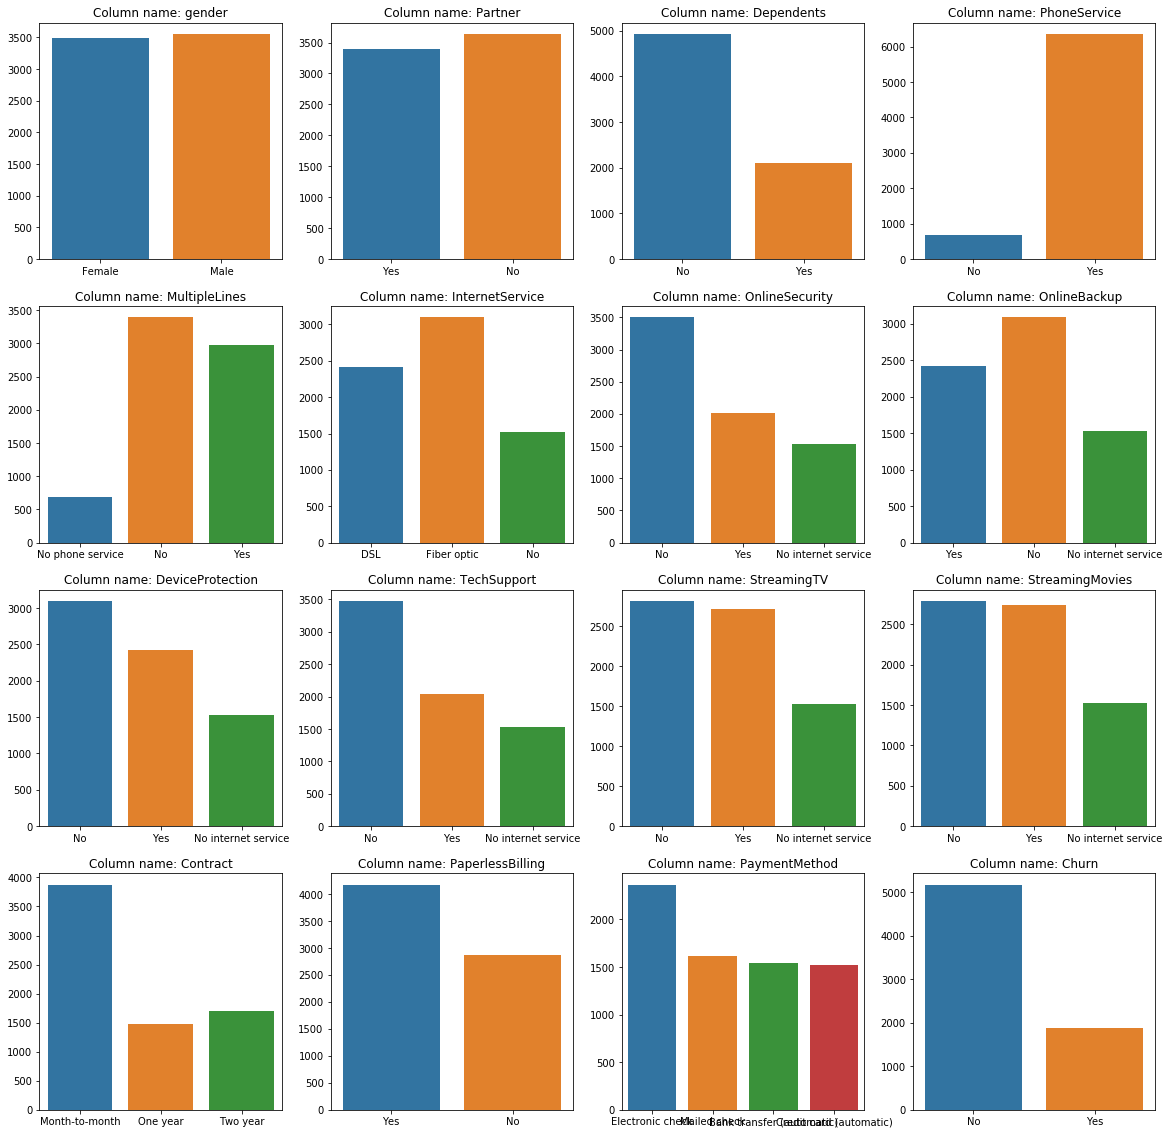

In [16]:
display_plot(df, 'customerid', object_mode = True)

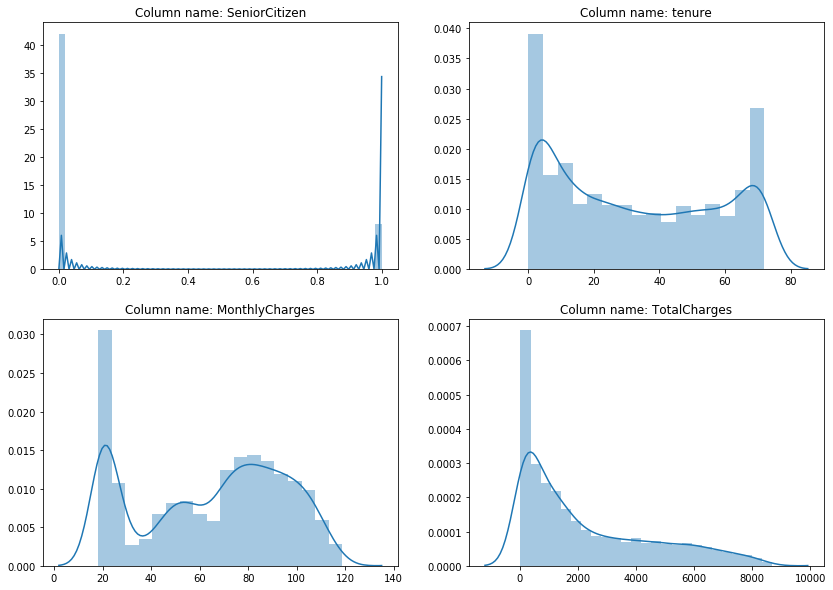

In [17]:
display_plot(df, 'customerid', object_mode = False)

###  feature Engineering 

Based on the value of the services the subscribers subscribed to, there are **yes**, **no**, and **no phone / internet service**. These are somewhat related to primary products. Examples are illustrated through *panda crosstab* function below:

1. **Phone service (Primary) and Multiple lines (Secondary)**
 
 - If the subscribers have phone service, they may have multiple lines (yes or no). 
 - But if the subscribers don't have phone service, the subscribers will never have multiple lines.
 

In [18]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


2. **Internet Service (Primary) and other services, let's say streaming TV (secondary)**

 - If the subscribers have Internet services (either DSL or Fiber optic), the subscribers may opt to have other services related to Internet (i.e. streaming TV, device protection).
 - But if the subscribers don't have the Internet services, this secondary service will not be available for the subscribers.
 

In [19]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


In [20]:
df.drop(columns='SeniorCitizen').groupby('Partner').describe().T
# We plot the statistics according to the 'Partner' variable

Partner                        No          Yes
tenure         count  3641.000000  3402.000000
               mean     23.357869    42.017637
               std      21.769526    23.698742
               min       0.000000     0.000000
               25%       4.000000    21.000000
               50%      16.000000    46.000000
               75%      39.000000    65.000000
               max      72.000000    72.000000
MonthlyCharges count  3641.000000  3402.000000
               mean     61.945001    67.776264
               std      29.060087    30.875503
               min      18.250000    18.400000
               25%      34.050000    39.362500
               50%      68.650000    74.800000
               75%      85.400000    94.050000
               max     118.650000   118.750000
TotalCharges   count  3641.000000  3402.000000
               mean   1585.344027  3030.290242
               std    1874.345006  2404.734975
               min      18.850000    18.800000
               25%     191.350000   930.912500
               50%     812.500000  2341.850000
               75%    2335.300000  4996.475000
               max    8547.150000  8684.800000

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043
Percent of Females that Left the Company 50.24077046548957
Percent of Males that Left the Company 49.75922953451043


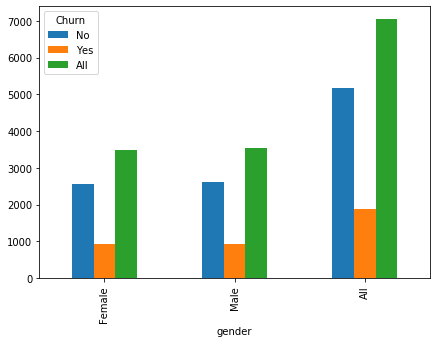

In [21]:
# Now Let's Start Comparing.
# Gender Vs Churn

print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));
print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100)) 

**We can See that Gender Does'nt Play an important Role in Predicting Our Target Variable.**

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043
Percent of Month-to-Month Contract People that Left the Company 88.55002675227395
Percent of One-Year Contract People that Left the Company 8.881754949170679
Percent of Two-Year Contract People that Left the Company 2.568218298555377


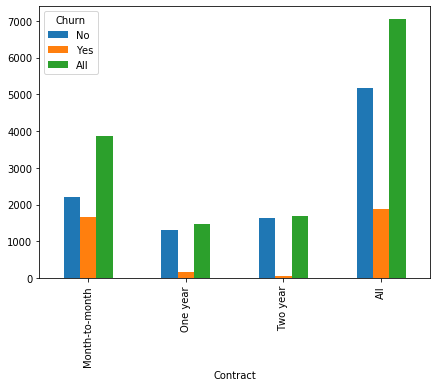

In [22]:

# Contract Vs Churn
print(pd.crosstab(df.Contract,df.Churn,margins=True))
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));


print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100)) 
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100)) 


**Most of the People that Left were the Ones who had Month-to-Month  Contract.**

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043
Percent of DSL Internet-Service People that Left the Company 24.558587479935795
Percent of Fiber Optic Internet-Service People that Left the Company 69.39539860888175
Percent of No Internet-Service People that Left the Company 6.046013911182451


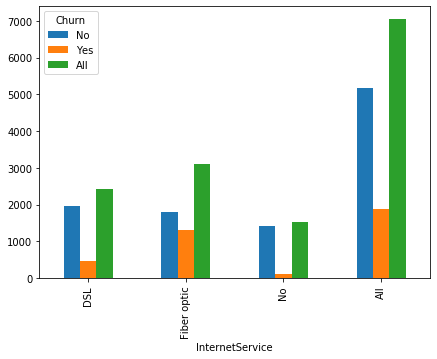

In [23]:
# Internet Service Vs Churn

# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297/1869)*100)) 
print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))  

**Most of the people That Left had Fiber Optic Internet-Service.**

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043
Percent of Partner that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


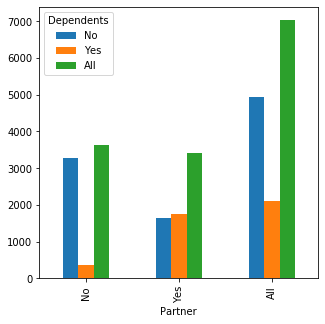

In [24]:
# Partner Vs Dependents
print(pd.crosstab(df.Partner,df.Dependents,margins=True))
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5));
print('Percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))     

**We can See Partners had a much larger percent of Dependents than Non-Partner this tells us that Most Partners might be Married.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


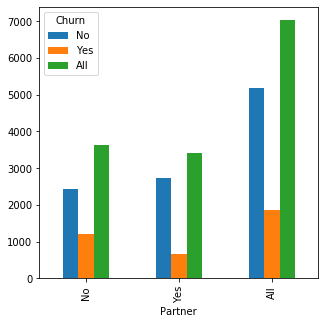

In [25]:
# Partner Vs Churn
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5));

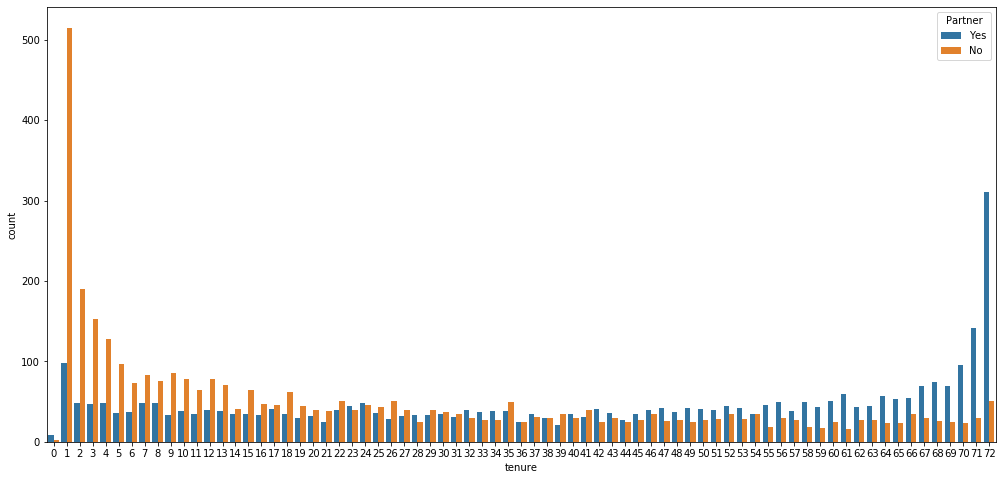

In [26]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

**Most of the People that Were Partner will Stay Longer with The Company. So Being a Partner is a Plus-Point For the Company as they will Stay Longer with Them.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


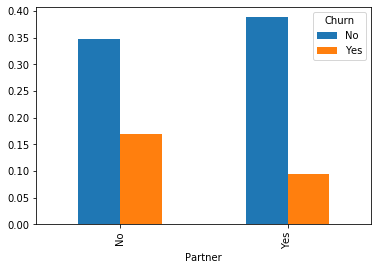

In [27]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,normalize=True).plot(kind='bar');


Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


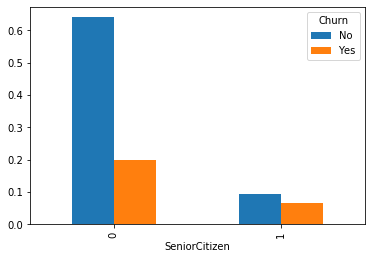

In [28]:
# Senior Citizen Vs Churn
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar');

**Let's Check for Outliers in Monthly Charges And Total Charges Using Box Plots**

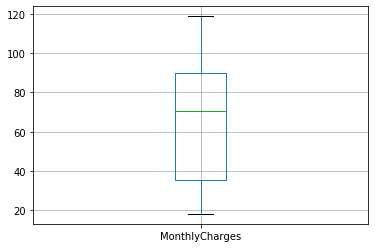

In [29]:
df.boxplot('MonthlyCharges');

**Monthly Charges don't have any Outliers so we don't have to Get into Extracting Information from Outliers.**

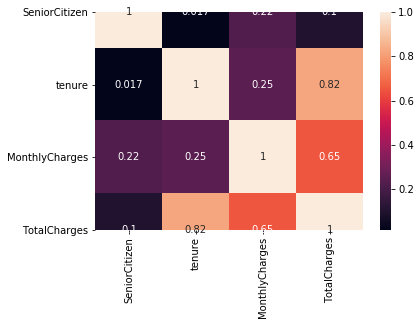

In [30]:
## correlation matrix 
# Let's Check the Correaltion Matrix in Seaborn
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);

**Here We can See Tenure and Total Charges are correlated and also Monthly charges and Total Charges are also correlated with each other.**

**we can assume from our domain expertise that , Total Charges ~ Monthly Charges * Tenure + Additional Charges(Tax).**

## <a id='9.4'> Bucketing </a>

In [31]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

# <a id='10'>10. Data preprocessing </a>

## <a id='10.1'> Encoding categorical variable </a>

In [32]:
#replace values
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]


#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

## <a id='10.2'> Normalizing features </a>

In [34]:
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
#dropping original values merging scaled values for numerical columns
df_org = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

## <a id='10.3'> spliting train/val/test data </a>

In [35]:
#Removing missing values 
df_org.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df_org.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)


In [36]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [37]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# <a id='11'>11. Model Building </a>

In [38]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, label_binarize


In [39]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7188831045906294
RandomForest : 0.767628963558921
Naive Bayes : 0.7113109323237103
KNeighbours : 0.7628963558920966
SVM : 0.8017037387600567
Neural Network : 0.7714150496923805
LogisticRegression : 0.8064363464268812
ExtraTreesClassifier : 0.7572172266919073
AdaBoostClassifier : 0.807382867960246
GradientBoostingClassifier:  0.808329389493611
XGB : 0.8064363464268812


In [40]:
# Metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    for sc in scores:
        scores = cross_val_score(model , X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))


In [41]:
cross_val_metrics(DecisionTreeClassifier())

[accuracy] : 0.73066 (+/- 0.01088)
[precision] : 0.49111 (+/- 0.01837)
[recall] : 0.49546 (+/- 0.02424)
[f1] : 0.48848 (+/- 0.01657)
[roc_auc] : 0.65653 (+/- 0.01806)


In [42]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [43]:
from sklearn import tree
# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier(max_depth=4)
# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(X_train, y_train)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
y_pred = classification_tree.predict(X_train)
probs = classification_tree.predict_proba(X_train)
print(confusion_matrix(y_train, y_pred))
# calculate AUC
auc = roc_auc_score(y_train, probs[:,1])
print('AUC: %.3f' % auc)
print(y_train.shape)
print(probs.shape)

[[3308  320]
 [ 689  613]]
AUC: 0.840
(4930,)
(4930, 2)


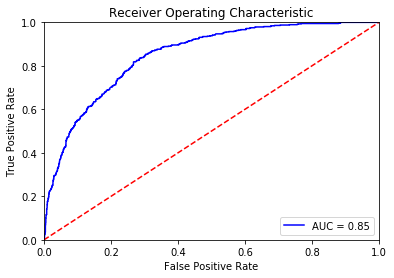

In [44]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### <a id='11.1'> Baseline model with DummyClassifier</a>

In [45]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [46]:
accuracy = clf.score(X_test, y_test)  
accuracy

0.7316611452910554

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, datasets, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [48]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    confus_matr = metrics.confusion_matrix(y_train, train_pred)
    precision = precision_score(y_train, train_pred)
    recall = recall_score(y_train, train_pred)
    F1 = f1_score(y_train, train_pred)
    auc = roc_auc_score(y_train, train_pred)
    
    return train_pred, acc, acc_cv, confus_matr, precision, recall, F1, auc

In [49]:
def trained_models():
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    svc_w_linear_kernel = SVC(kernel='linear')
    svc_w_linear_kernel.fit(X_train, y_train)

    svc_wo_linear_kernel = SVC()
    svc_wo_linear_kernel.fit(X_train, y_train)

    dummy = DummyClassifier()
    dummy.fit(X_train, y_train)

    return {'RF':rf, 'LR':lr, 'SVC_w_linear_kernel':svc_w_linear_kernel,
            'Dummy':dummy, 'SVC_wo_linear_kernel':svc_wo_linear_kernel} 

In [50]:
trained_models()

{'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'LR': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'SVC_w_linear_kernel': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     ke

In [51]:
preds = clf.predict(X_test)

import time
import io, os, sys, types, time, datetime, math, random
# dummyistic Regression
start_time = time.time()
train_pred
test_pred
acc
my, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
dummy_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

print (metrics.classification_report(y_train, train_pred_dummy))

print (metrics.classification_report(y_test, test_pred_dummy))

## Select Candidate Algorithms

### 1. KNN
### 2. Logistic Regression
### 3. Random Forest
### 4. Naive Bayes
### 5. Stochastic Gradient Decent
### 6. Linear SVC
### 7. Decision Tree
### 8. Gradient Boosted Trees

In [62]:
train_pred_knn, acc_knn, acc_cv_knn, cfmt_knn, prec_knn, rec_knn, F1_knn, auc_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                                                                X_train, 
                                                                                                y_train, 
                                                                                                10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Confusion Matrix: %s" % cfmt_knn)
print("Precision: ", float("{0:.3f}".format(round(prec_knn, 3))))
print("Recall: ", float("{0:.3f}".format(round(rec_knn, 3))))
print("F1 Score: ", float("{0:.3f}".format(round(F1_knn, 3))))
print("AUC: ", float("{0:.3f}".format(round(auc_knn, 3))))


Accuracy: 84.04
Accuracy CV 10-Fold: 76.94
Confusion Matrix: [[3114  514]
 [ 623  679]]
Precision:  0.569
Recall:  0.522
F1 Score:  0.544
AUC:  0.69


KNN
--------------
Accuracy: 84.04
Accuracy CV 10-Fold: 76.94
Running Time: 0:00:00
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1546
           1       0.57      0.49      0.53       567

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.68      2113
weighted avg       0.75      0.76      0.76      2113



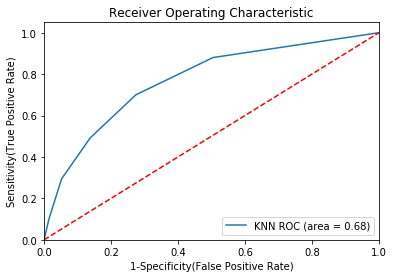

In [66]:
from sklearn.metrics import classification_report

print("KNN")
print("--------------")
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

start_time = time.time()
dummy_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot

model = knn
label= 'KNN'
model.fit(X_train, y_train) # train the model
y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Accuracy: 80.49
Accuracy CV 10-Fold: 80.06
Confusion Matrix: [[3271  357]
 [ 626  676]]
Precision:  0.654
Recall:  0.519
F1 Score:  0.579
AUC:  0.71
Running Time: 0:00:00
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1546
           1       0.69      0.51      0.59       567

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



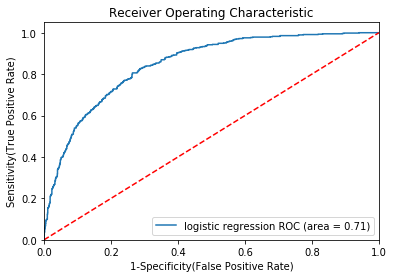

In [67]:
train_pred_log, acc_log, acc_cv_log, cfmt_log, prec_log, rec_log, F1_log, auc_log = fit_ml_algo(LogisticRegression(), 
                                                                                               X_train, 
                                                                                               y_train, 
                                                                                                10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
#print("Confusion Matrix: %s" % cfmt_log)
print("Precision: ", float("{0:.3f}".format(round(prec_log, 3))))
print("Recall: ", float("{0:.3f}".format(round(rec_log, 3))))
print("F1 Score: ", float("{0:.3f}".format(round(F1_log, 3))))
print("AUC: ", float("{0:.3f}".format(round(auc_log, 3))))

from sklearn.metrics import classification_report


start_time = time.time()
dummy_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot

model = lr
label= 'logistic regression'
model.fit(X_train, y_train) # train the model
y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Accuracy: 70.18
Accuracy CV 10-Fold: 70.16
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1546
           1       0.48      0.82      0.60       567

    accuracy                           0.71      2113
   macro avg       0.69      0.75      0.69      2113
weighted avg       0.79      0.71      0.73      2113



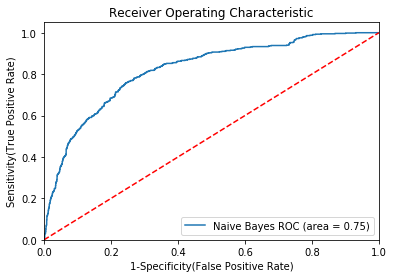

In [72]:
train_pred_gaussian, acc_gaussian, acc_cv_gaussian, cfmt_gaussian, prec_gaussian, rec_gaussian, F1_gaussian, auc_gaussian = fit_ml_algo(GaussianNB(), 
                                                                                                              X_train, 
                                                                                                              y_train, 
                                                                                                               10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
nv = GaussianNB()
nv.fit(X_train, y_train)
y_pred = nv.predict(X_test)
print(classification_report(y_test,y_pred))
model = nv
label= 'Naive Bayes'

fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   



Accuracy: 83.45
Accuracy CV 10-Fold: 79.76
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1546
           1       0.68      0.54      0.60       567

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



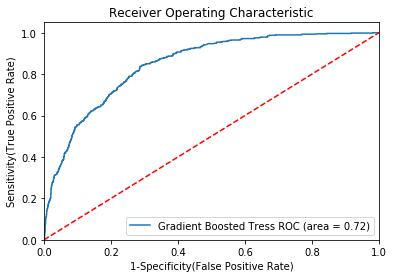

In [73]:
train_pred_gbt, acc_gbt, acc_cv_gbt, cfmt_gbt, prec_gbt, rec_gbt, F1_gbt, auc_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                                               X_train, 
                                                                                               y_train,
                                                                                               10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

model = gb
label= 'Gradient Boosted Tress'

print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  

In [75]:
train_pred_sgd, acc_sgd, acc_cv_sgd, cfmt_sgd, prec_sgd, rec_sgd, F1_sgd, auc_sgd = fit_ml_algo(SGDClassifier(), 
                                                                                                  X_train, 
                                                                                                  y_train,
                                                                                                  10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

model = sgd
label= 'Stochastic Gradient Descent'

print(classification_report(y_test,y_pred))


Accuracy: 79.17
Accuracy CV 10-Fold: 78.86
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1546
           1       0.76      0.28      0.40       567

    accuracy                           0.78      2113
   macro avg       0.77      0.62      0.64      2113
weighted avg       0.78      0.78      0.74      2113



In [79]:
train_pred_svc, acc_linear_svc, acc_cv_linear_svc, cfmt_svc, prec_svc, rec_svc, F1_svc, auc_svc = fit_ml_algo(LinearSVC(),
                                                                                                                X_train, 
                                                                                                                y_train, 
                                                                                                                10)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

model = lsvc
label= 'Linear SVC'

print(classification_report(y_test,y_pred))


Accuracy: 80.24
Accuracy CV 10-Fold: 80.02
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1546
           1       0.69      0.49      0.57       567

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



## <a id='' > Compare all models </a>

In [85]:
models = pd.DataFrame({
    'Model': ['KNN','Gradient Boosting Trees', 'Logistic Regression','Linear SVC','Stochastic Gradient Decent', 'Naive Bayes' 
                
               ],
    'Score': [
        acc_knn, acc_gbt,
        acc_log,
        acc_linear_svc,
        acc_sgd, 
        acc_gaussian, 
         
         
        
        
        
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
0,KNN,84.04
1,Gradient Boosting Trees,83.45
2,Logistic Regression,80.49
3,Linear SVC,80.24
4,Stochastic Gradient Decent,79.17
5,Naive Bayes,70.18


***